In [1]:
# Importing modules
try:
    import hsbalance as hs;
except ImportError:
    !pip install hsbalance
    import hsbalance as hs;
try:
    import matplotlib as plt
except ImportError:
    !pip install matplotlib
    import matplotlib as plt
try:
    import ipympl
except ImportError:
    !pip install ipympl
    import ipympl

Using the Community license in this session. If you have a full Xpress license, first set the XPAUTH_PATH environment variable to the full path to your license file, xpauth.xpr, and then restart Python. If you want to use the FICO Community license and no longer want to see this message, set the XPAUTH_PATH environment variable to: /home/maged/anaconda3/envs/balance/lib/python3.8/site-packages/xpress/license/community-xpauth.xpr
NB: setting XPAUTH_PATH will also affect any other Xpress products installed on your system.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

# Introduction
In this notebook, We try to reproduce the results of test case in this paper:  [Jeong](https://hal.archives-ouvertes.fr/hal-01890082)    

Sena Jeong, Eojin Kim, Kyungho Jeong, Doyoung Jeon, Yong Bok Lee. Effects of Residual Imbalance
on the Rotordynamic Performance of Variable-Speed Turbo Blower. 16th International Symposium
on Transport Phenomena and Dynamics of Rotating Machinery, Apr 2016, Honolulu, United States.
�hal-01890082�

"""This paper has provided a successful experiment and  
simulation results for verifying residual imbalance effect and  
rotordynamic performance with two-plane multi-speed  
balancing by applying influence coefficient method. A rotor  
bearing system application of a variable turbo blower,  
experiments were conducted to ensure rotational stability.  
Base on the least square balancing technique, the  
experiment was determined the multi-speed point. It was  
measured peak to peak vibration and phase angle at each  
speed, according to the multi-speed condition, calculated the  
residual unbalance and correction value. The rotational  
speed of the variable speed application turbo machine is up  
to 17,000 rpm, the maximum rotational speed is 20,000 rpm.  """

In this case study, the author tried to see the effect of calculating the least square model from different speed data.  
This is very good example to show how it is easy and explicit to use `hsbalance` module to test different scenarios.

# Trial Mass

In [3]:
# from Table 1
U = hs.convert_math_cart(['1.369@-11.25', '2.039@-22.5'])

## Intial Conditions

In [4]:
# Rewriting table 2 for zero rotor data (intiail conditions)
A_17000 = [['0.1750@-179.2'],
          ['0.0091@134.9']]
A_18000 = [['0.1838@-170.9'],
          ['0.0313@137.3']]
A_18500 = [['0.2472@179.4'],
          ['0.0207@118.9']]
A_19000 = [['0.4425@-179.6'],
          ['0.0243@95.7']]
A_19500 = [['0.6830@-160.7'],
          ['0.036@102.6']]
A_20000 = [['0.6905@-150.6'],
          ['0.0383@99.2']]


# Creating Influence Matrix

In [5]:
# Creating trial run matrix B
B_17000 = [['0.1527@-24.7', '0.3343@177.6'],
          ['0.0245@-172.4', '0.0308@42.0']]

B_18000 = [['0.1395@-0.1', '0.3668@-173.1'],
          ['0.0147@-130.7', '0.0384@81.6']]

B_18500 = [['0.1285@-19.8', '0.4536@-180.0'],
          ['0.0121@179.8', '0.0385@73.2']]

B_19000 = [['0.1882@-18.6', '0.0192@178.2'],
          ['0.0192@178.2', '0.0469@68.7']]

B_19500 = [['0.2847@18.2', '0.7713@-154.2'],
          ['0.0119@179.9', '0.0493@79.0']]

B_20000 = [['0.2705@55.4', '0.7650@-147.2'],
          ['0.0234@138.7', '0.0601@71.3']]

In [6]:
# Creating Alpha (IC matrix)
alpha_17000 = hs.Alpha('17000')
A_17000, B_17000 = list(map(hs.convert_math_cart, [A_17000, B_17000]))
alpha_17000.add(A=A_17000, B=B_17000, U=U)

alpha_18000 = hs.Alpha('18000')
A_18000, B_18000 = list(map(hs.convert_math_cart, [A_18000, B_18000]))
alpha_18000.add(A=A_17000, B=B_17000, U=U)

alpha_18500 = hs.Alpha('18500')
A_18500, B_18500 = list(map(hs.convert_math_cart, [A_18500, B_18500]))
alpha_18500.add(A=A_18500, B=B_18500, U=U)

alpha_19000 = hs.Alpha('19000')
A_19000, B_19000 = list(map(hs.convert_math_cart, [A_19000, B_19000]))
alpha_19000.add(A=A_19000, B=B_19000, U=U)

alpha_19500 = hs.Alpha('19500')
A_19500, B_19500 = list(map(hs.convert_math_cart, [A_19500, B_19500]))
alpha_19500.add(A=A_19500, B=B_19500, U=U)

alpha_20000 = hs.Alpha('20000')
A_20000, B_20000 = list(map(hs.convert_math_cart, [A_20000, B_20000]))
alpha_20000.add(A=A_20000, B=B_20000, U=U)

# Creating Conditions

In [7]:
condition_17000 = hs.Condition('17000')
condition_17000.add(alpha=alpha_17000, A=A_17000)
condition_18000 = hs.Condition('18000')
condition_18000.add(alpha=alpha_18000, A=A_18000)
condition_18500 = hs.Condition('18500')
condition_18500.add(alpha=alpha_18500, A=A_18500)
condition_19000 = hs.Condition('19000')
condition_19000.add(alpha=alpha_19000, A=A_19000)
condition_19500 = hs.Condition('19500')
condition_19500.add(alpha=alpha_19500, A=A_19500)
condition_20000 = hs.Condition('20000')
condition_20000.add(alpha=alpha_20000, A=A_20000)

# Creating LeastSquare Model for Cases

In [16]:
# Case 1 
model_case1 = hs.LeastSquares(name='case1', conditions=
                              [condition_17000, condition_18500])
model_case1.solve()
print(model_case1.info())


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL TYPE
LeastSquares
End of MODEL TYPE
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL NAME
case1
End of MODEL NAME
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CONDITIONS

++++++++++++++++++++++++++++++++++++++++++++++++++
Operation Condition
++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++
Name
17000
End of Name
++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++
Condition IC Matrix

++++++++++++++++++++++++++++++++++++++++
Influence Coefficient Matrix
+++++++++++++++++++++++

In [17]:
## Case 2

model_case2 = hs.LeastSquares(name='case2', conditions=
                              [condition_17000, condition_19500])
model_case2.solve()
print(model_case2.info())


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL TYPE
LeastSquares
End of MODEL TYPE
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL NAME
case2
End of MODEL NAME
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CONDITIONS

++++++++++++++++++++++++++++++++++++++++++++++++++
Operation Condition
++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++
Name
17000
End of Name
++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++
Condition IC Matrix

++++++++++++++++++++++++++++++++++++++++
Influence Coefficient Matrix
+++++++++++++++++++++++

In [18]:
## Case 3

model_case3 = hs.LeastSquares(name='case3',conditions=
                              [condition_17000, condition_18500,
                              condition_19500])
model_case3.solve()
print(model_case3.info())


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL TYPE
LeastSquares
End of MODEL TYPE
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL NAME
case3
End of MODEL NAME
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CONDITIONS

++++++++++++++++++++++++++++++++++++++++++++++++++
Operation Condition
++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++
Name
17000
End of Name
++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++
Condition IC Matrix

++++++++++++++++++++++++++++++++++++++++
Influence Coefficient Matrix
+++++++++++++++++++++++

In [19]:
## Case 4

model_case4 = hs.LeastSquares(name='case4',conditions=
                              [condition_17000, condition_19000,
                              condition_20000])
model_case4.solve()
print(model_case4.info())


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL TYPE
LeastSquares
End of MODEL TYPE
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MODEL NAME
case4
End of MODEL NAME
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
CONDITIONS

++++++++++++++++++++++++++++++++++++++++++++++++++
Operation Condition
++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++
Name
17000
End of Name
++++++++++++++++++++++++++++++++++++++++++++++++++

                   
++++++++++++++++++++++++++++++++++++++++++++++++++
Condition IC Matrix

++++++++++++++++++++++++++++++++++++++++
Influence Coefficient Matrix
+++++++++++++++++++++++

In [20]:
def plot_models(models):
    residule_vibration = {model.name:abs(model.expected_residual_vibration().ravel()) for model in models}
    rmse = {model.name:model.rmse() for model in models}
    fig, (ax0, ax1) = plt.subplots(2, 1)
    ax0.bar(rmse.keys(), rmse.values())
    plt.xlabel('Models')
    plt.ylabel('Vibration');
    models_number = len(residule_vibration.values())
    measuring_points = max((len(array) for array in residule_vibration.values()))

    jet= plt.get_cmap('jet')
    colors = iter(jet(np.linspace(0,1,models_number)))

    step = 0
    for array in residule_vibration.values():
        ax1.bar(np.arange(len(array)) + step, array, color = next(colors), width = 1/models_number)
        step += 1 / (models_number+1)
    ax1.legend([model.name for model in models])
    ax1.set_xticks(range(measuring_points), ['M.P '+ str(point) for point in range(1, 1+measuring_points)],
                  rotation =45);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
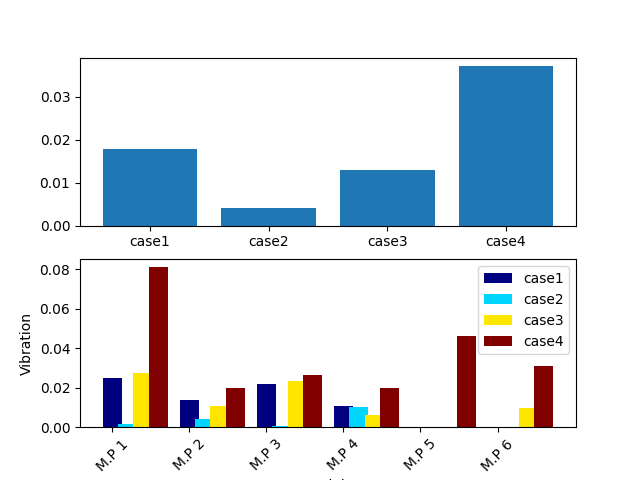

In [21]:
plot_models([model_case1, model_case2, model_case3, model_case4])

As in the paper, case 2 was the best RMSE score. Residual vibration was minminum at bearing a (M.P.1) in case 2.